In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,roc_curve
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/ASUS/Desktop/MINI_project/Data_p/preprocessed.csv")

# Drop unnecessary column
df.drop(columns=["RISK_MM"], inplace=True)

# Define features and target
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"].astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
y_proba_full = model.predict_proba(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred, pos_label=1)
prec_0 = precision_score(y_test, y_pred, pos_label=0)
rec_1 = recall_score(y_test, y_pred, pos_label=1)
rec_0 = recall_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
gmean = np.sqrt((rec_1 * rec_0))
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)


Decision Tree Classifier Results:
Accuracy      : 0.78
Precision (1) : 0.51
Precision (0) : 0.87
Recall (1)    : 0.54
Recall (0)    : 0.85
F1 Score (1)  : 0.53
F1 Score (0)  : 0.86
G-Mean        : 0.68
ROC AUC Score : 0.70

Confusion Matrix:
 [[18884  3214]
 [ 2933  3408]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     22098
           1       0.51      0.54      0.53      6341

    accuracy                           0.78     28439
   macro avg       0.69      0.70      0.69     28439
weighted avg       0.79      0.78      0.79     28439


Average Probability of 'No Rain': 0.77


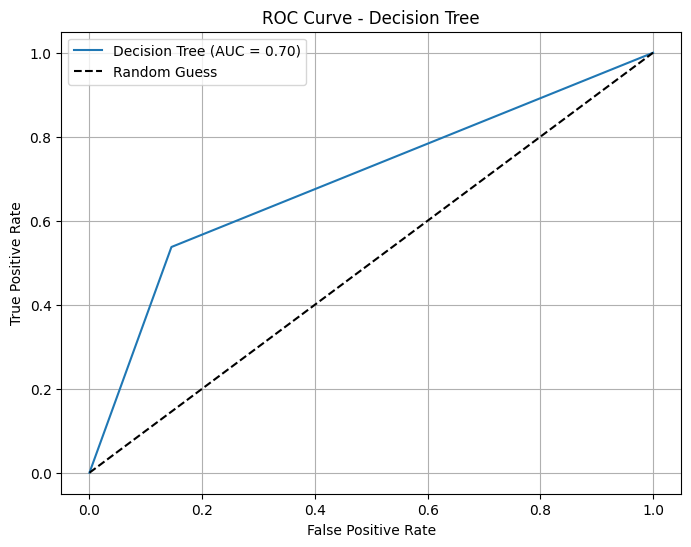

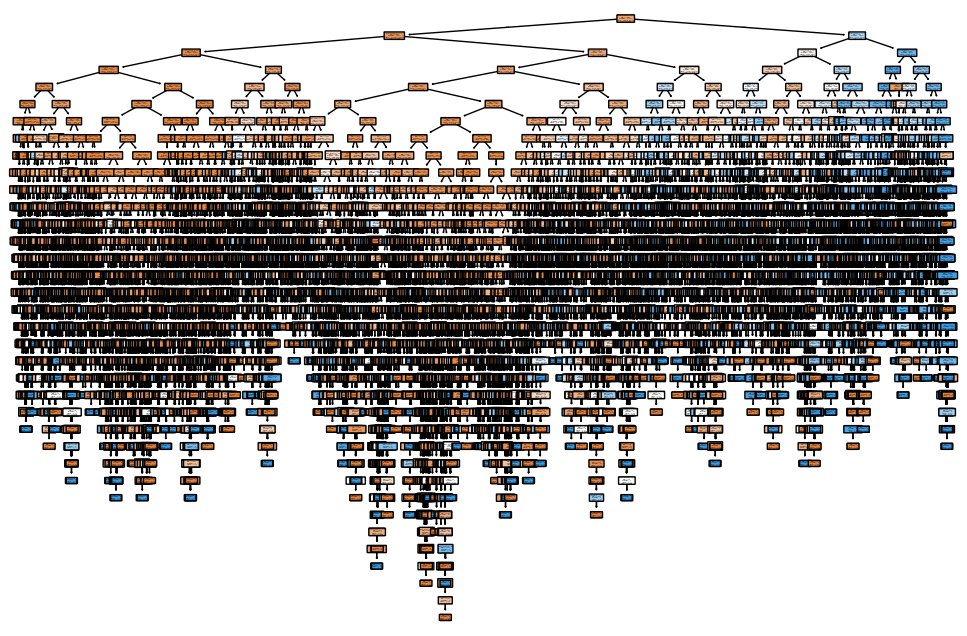

In [8]:
# Output
print("Decision Tree Classifier Results:")
print(f"Accuracy      : {acc:.2f}")
print(f"Precision (1) : {prec_1:.2f}")
print(f"Precision (0) : {prec_0:.2f}")
print(f"Recall (1)    : {rec_1:.2f}")
print(f"Recall (0)    : {rec_0:.2f}")
print(f"F1 Score (1)  : {f1_1:.2f}")
print(f"F1 Score (0)  : {f1_0:.2f}")
print(f"G-Mean        : {gmean:.2f}")
print(f"ROC AUC Score : {auc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Probability of no rain
prob_no_rain = y_proba_full[:, 0]
print(f"\nAverage Probability of 'No Rain': {prob_no_rain.mean():.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid()
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Rain', 'Rain'], rounded=True)
plt.show()